In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [3]:
df=pd.read_csv('heart.csv')

In [15]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Dummy Clasifier

In [16]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.5024390243902439

## Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_f1_score=metrics.f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

Test Accuracy score:  0.8634146341463415
Test F1 score:  0.8771929824561404
confusion matrix
[[ 77  21]
 [  7 100]]


              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205


## KNN

In [18]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(X_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.8829268292682927
Test F1 score:  0.8899082568807339
confusion matrix
[[84 14]
 [10 97]]


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        98
           1       0.87      0.91      0.89       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205


## Random Forest

In [19]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_forest = rfc.predict(X_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  1.0
Test F1 score:  1.0
confusion matrix
[[ 98   0]
 [  0 107]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       107

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


## Naive Bayes

In [20]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.8536585365853658
Test F1 score:  0.8648648648648648
confusion matrix
[[79 19]
 [11 96]]


              precision    recall  f1-score   support

           0       0.88      0.81      0.84        98
           1       0.83      0.90      0.86       107

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205


## Support Vector Classifier

In [21]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.9804878048780488
Test F1 score:  0.9816513761467891
confusion matrix
[[ 94   4]
 [  0 107]]


Accuracy of Support Vector Classifier: 0.9804878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205


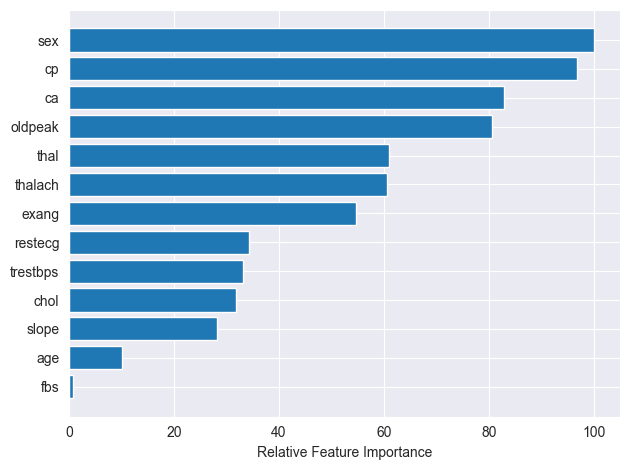

In [22]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# Model Evaluation

In [29]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Naive Bayes', 'Support Vector Classifier'], 'Accuracy': [lr_acc_score,rfc_acc_score,knn_acc_score,nb_acc_score, svc_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.863415
1,Random Forest,1.000000
2,K-Nearest Neighbour,0.882927
3,Naive Bayes,0.853659
4,Support Vector Classifier,0.980488


## Plot ROC Curves

In [30]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_forest)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_nb)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, y_pred_svc)


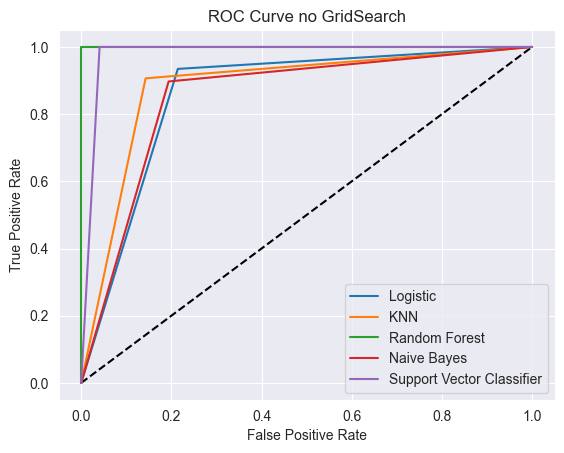

In [31]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_rfc, tpr_rfc,label = 'Random Forest')
plt.plot(fpr_nb,tpr_nb,label= 'Naive Bayes')
plt.plot(fpr_svc,tpr_svc,label= 'Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve no GridSearch')
plt.show()

In [32]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc)))

AUC Logistic: 0.8601468624833111
AUC KNN: 0.8818424566088118
AUC Random Forest: 1.0
AUC Naive Bayes: 0.8516593553309175
AUC Support Vector Classifier: 0.9795918367346939


# Grid Search CV

## LR Grid

In [34]:
param_grid_log =  {'penalty' : ['l1', 'l2'],
                   'C' : np.logspace(-4, 4, 20),
                  }
grid_search_log = GridSearchCV(estimator = logreg, param_grid = param_grid_log,cv = 7,scoring = 'accuracy',n_jobs = -1)

In [36]:
grid_search_log.fit(X_train,y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 11.288378916846883, 'penalty': 'l2'}


/Library/Python/3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Python/3.9/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Python/3.9/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Library/Python/3.9/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Library/Python/3.9/site

In [37]:
logreg_grid = LogisticRegression(**log_params)

logreg_grid.fit(X_train, y_train)

y_pred_log_grid = logreg_grid.predict(X_test)

lr_f1_score2=metrics.f1_score(y_test, y_pred_log_grid)
lr_acc_score2=metrics.accuracy_score(y_test, y_pred_log_grid)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score2)

# checking F1
print('Test F1 score: ', lr_f1_score2)

Test Accuracy score:  0.8634146341463415
Test F1 score:  0.8771929824561404


## NB Grid

In [38]:
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [39]:
param_grid_nb =  {'var_smoothing': np.logspace(0,-20, num=2)}
#0,-20, num=10
grid_search_nb = GridSearchCV(estimator = nb, param_grid = param_grid_nb, scoring = 'accuracy')

In [40]:
grid_search_nb.fit(X_train,y_train)
nb_params = grid_search_nb.best_params_
print(nb_params)

{'var_smoothing': 1.0}


In [41]:
nb_grid = GaussianNB(**nb_params)
nb_grid.fit(X_train,y_train)
y_pred_nb_grid = nb_grid.predict(X_test)
nb_f1_score2=metrics.f1_score(y_test, y_pred_nb_grid)
nb_acc_score2=metrics.accuracy_score(y_test, y_pred_nb_grid)


# checking accuracy
print('Test F1 score: ', nb_f1_score2)
print('Test Accuracy score: ', nb_acc_score2)

Test F1 score:  0.8632478632478633
Test Accuracy score:  0.8439024390243902


## SVC Grid

In [42]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [43]:
param_grid_svc =  {'kernel':['linear', 'rbf', 'poly'],
                   'C' :[0.01,0.1, 1, 1.5,2],
                   'class_weight':['balanced', None]
                  }
grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid_svc,cv = 7,scoring = 'accuracy', n_jobs = -1)

In [44]:
grid_search_svc.fit(X_train,y_train)
svc_params = grid_search_svc.best_params_
print(svc_params)

{'C': 2, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [45]:
svc_grid = SVC(**svc_params, probability=True)
svc_grid.fit(X_train,y_train)
y_pred_svc_grid = svc_grid.predict(X_test)
svc_f1_score2=metrics.f1_score(y_test, y_pred_svc_grid)
svc_acc_score2=metrics.accuracy_score(y_test, y_pred_svc_grid)

svc_conf_matrix = confusion_matrix(y_test, y_pred_svc_grid)
svc_acc_score_grid = metrics.accuracy_score(y_test, y_pred_svc_grid)
print('Test F1 score: ',svc_f1_score2)
print('Test Accuracy score:', svc_acc_score2)

Test F1 score:  0.9816513761467891
Test Accuracy score: 0.9804878048780488


# KNN Grid

In [46]:
param_grid_knn = {'n_neighbors' : [5,10,15,20],
                 'weights':['uniform','distance']
                 }
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn,cv = 3, scoring = 'f1',n_jobs = -1)


In [47]:
grid_search_knn.fit(X_train,y_train)
knn_params = grid_search_knn.best_params_
print(knn_params)

{'n_neighbors': 20, 'weights': 'distance'}


In [48]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(X_train,y_train)
y_pred_knn_grid = knn_grid.predict(X_test)
knn_f1_score2=metrics.f1_score(y_test, y_pred_knn_grid)
knn_acc_score2=metrics.accuracy_score(y_test, y_pred_knn_grid)

print('Test F1 score: ', knn_f1_score2)
print('Test Accuracy score: ', knn_acc_score2)

Test F1 score:  1.0
Test Accuracy score:  1.0


# Random forest grid

In [51]:
param_grid_forest = { 
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [50,60,70],
    'max_depth': [4,5,6],
    'max_features': ['auto', 'log2']
}

grid_search_forest = GridSearchCV(estimator = rfc, param_grid = param_grid_forest,cv = 5,scoring = 'accuracy')

In [ ]:
grid_search_forest.fit(X_train,y_train)
forest_params = grid_search_forest.best_params_
print(forest_params)

In [53]:
forest_grid = RandomForestClassifier(**forest_params)
forest_grid.fit(X_train, y_train)
y_pred_forest_grid = forest_grid.predict(X_test)
rfc_f1_score2=metrics.f1_score(y_test, y_pred_forest_grid)
rfc_acc_score2=metrics.accuracy_score(y_test, y_pred_forest_grid)

print('Test F1 score: ',rfc_f1_score2)
print('Test Accuracy score: ', rfc_acc_score2)


Test F1 score:  0.9814814814814815
Test Accuracy score:  0.9804878048780488


# Grid Search

In [54]:
model_ev2 = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Naive Bayes', 'Support Vector Classifier'], 'Accuracy': [lr_acc_score2,
                    rfc_acc_score2,knn_acc_score2,nb_acc_score2, svc_acc_score2]})
model_ev2

,Model,Accuracy
0,Logistic Regression,0.863415
1,Random Forest,0.980488
2,K-Nearest Neighbour,1.000000
3,Naive Bayes,0.843902
4,Support Vector Classifier,0.980488


In [56]:
from mlxtend.classifier import StackingCVClassifier

scv=StackingCVClassifier(classifiers=[logreg_grid,nb_grid,svc_grid],meta_classifier=logreg_grid,random_state=22)
scv.fit(X_train,y_train)
scv_predicted = scv.predict(X_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[ 94   4]
 [  0 107]]


Accuracy of StackingCVClassifier: 98.04878048780488 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        98
           1       0.96      1.00      0.98       107

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205


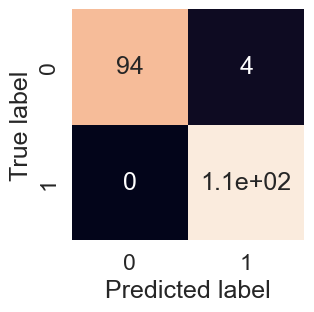

In [66]:
cm = confusion_matrix(y_test, scv_predicted)

import seaborn as sns
sns.set(font_scale=1.5)
 
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(cm,
                     annot=True,
                     cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, scv_predicted)

In [ ]:
fpr_log_grid, tpr_log_grid, thresholds_log2 = roc_curve(y_test, y_pred_log_grid)
fpr_knn_grid, tpr_knn_grid, thresholds_knn2 = roc_curve(y_test, y_pred_knn_grid)
fpr_rfc_grid, tpr_rfc_grid, thresholds_rfc2 = roc_curve(y_test, y_pred_forest_grid)
fpr_nb_grid, tpr_nb_grid, thresholds_nb2 = roc_curve(y_test, y_pred_nb_grid)
fpr_svc_grid, tpr_svc_grid, thresholds_svc2 = roc_curve(y_test, y_pred_svc_grid)

# Plot ROC Curves

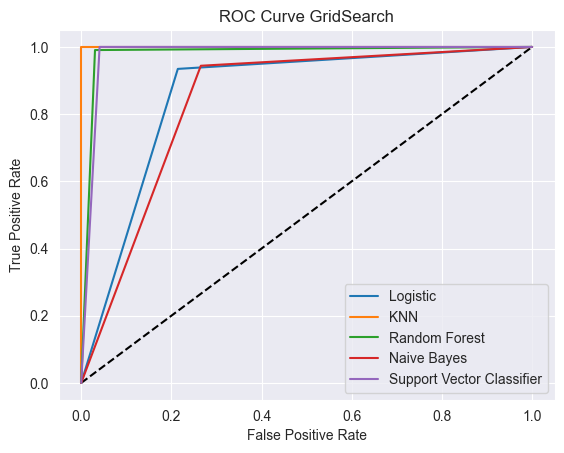

In [62]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log_grid, tpr_log_grid,label = 'Logistic')
plt.plot(fpr_knn_grid, tpr_knn_grid,label = 'KNN')
plt.plot(fpr_rfc_grid, tpr_rfc_grid,label = 'Random Forest')
plt.plot(fpr_nb_grid,tpr_nb_grid,label= 'Naive Bayes')
plt.plot(fpr_svc_grid,tpr_svc_grid,label= 'Support Vector Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve GridSearch')
plt.show()

In [64]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log_grid)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn_grid)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest_grid)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb_grid)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc_grid)))

AUC Logistic: 0.8601468624833111
AUC KNN: 1.0
AUC Random Forest: 0.9800209803547586
AUC Naive Bayes: 0.83930955559794
AUC Support Vector Classifier: 0.9795918367346939


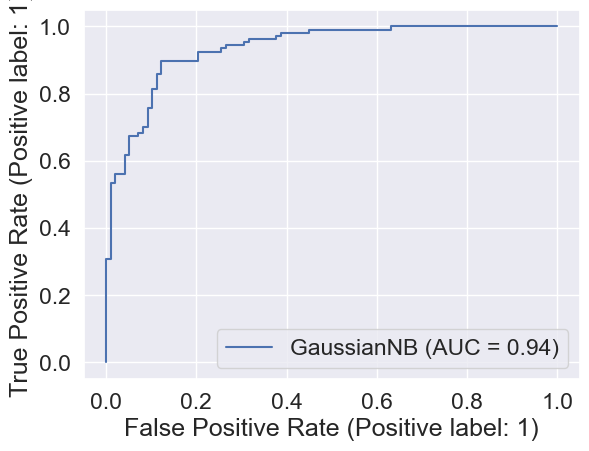

In [70]:
from sklearn.metrics import RocCurveDisplay 
RocCurveDisplay.from_estimator(estimator=nb_grid, X=X_test, y=y_test); 